In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from pandas import date_range
from statsmodels.graphics.tsaplots import plot_pacf

In [2]:
df= pd.read_csv('BTC-USDT.csv')
df.head()

,open_time,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
0,2017-08-17 04:00:00,4261.48,4261.48,4261.48,4261.48,1.775183,7564.906700,3,0.075183,320.390840
1,2017-08-17 04:01:00,4261.48,4261.48,4261.48,4261.48,0.000000,0.000000,0,0.000000,0.000000
2,2017-08-17 04:02:00,4280.56,4280.56,4280.56,4280.56,0.261074,1117.543000,2,0.261074,1117.543000
3,2017-08-17 04:03:00,4261.48,4261.48,4261.48,4261.48,0.012008,51.171852,3,0.012008,51.171852
4,2017-08-17 04:04:00,4261.48,4261.48,4261.48,4261.48,0.140796,599.999300,1,0.140796,599.999300


In [3]:
df['open_time'] = pd.to_datetime(df['open_time'], utc=True, errors='coerce')
df.dropna(subset=['open_time'], inplace=True)

df.set_index('open_time', inplace=True)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2719849 entries, 2017-08-17 04:00:00+00:00 to 2022-11-16 23:59:00+00:00
Data columns (total 9 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   open                          float64
 1   high                          float64
 2   low                           float64
 3   close                         float64
 4   volume                        float64
 5   quote_asset_volume            float64
 6   number_of_trades              int64  
 7   taker_buy_base_asset_volume   float64
 8   taker_buy_quote_asset_volume  float64
dtypes: float64(8), int64(1)
memory usage: 207.5 MB


In [5]:
df.describe()

,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
count,2.719849e+06,2.719849e+06,2.719849e+06,2.719849e+06,2.719849e+06,2.719849e+06,2.719849e+06,2.719849e+06,2.719849e+06
mean,1.957834e+04,1.959163e+04,1.956493e+04,1.957833e+04,4.577014e+01,9.961795e+05,8.064676e+02,2.277719e+01,4.931036e+05
std,1.700855e+04,1.701994e+04,1.699722e+04,1.700856e+04,8.191942e+01,2.023503e+06,1.390432e+03,4.181864e+01,1.037155e+06
min,2.830000e+03,2.830000e+03,2.817000e+03,2.817000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.219830e+03,7.222980e+03,7.216020e+03,7.219870e+03,1.095620e+01,9.875834e+04,1.350000e+02,5.020876e+00,4.606750e+04
50%,1.033898e+04,1.034476e+04,1.033246e+04,1.033894e+04,2.260310e+01,3.129225e+05,3.650000e+02,1.085292e+01,1.495799e+05
75%,3.251659e+04,3.255102e+04,3.248648e+04,3.251645e+04,4.735809e+01,1.091498e+06,8.740000e+02,2.356128e+01,5.264355e+05
max,6.900000e+04,6.900000e+04,6.878670e+04,6.900000e+04,4.448796e+03,1.155494e+08,6.258400e+04,2.851740e+03,8.947550e+07


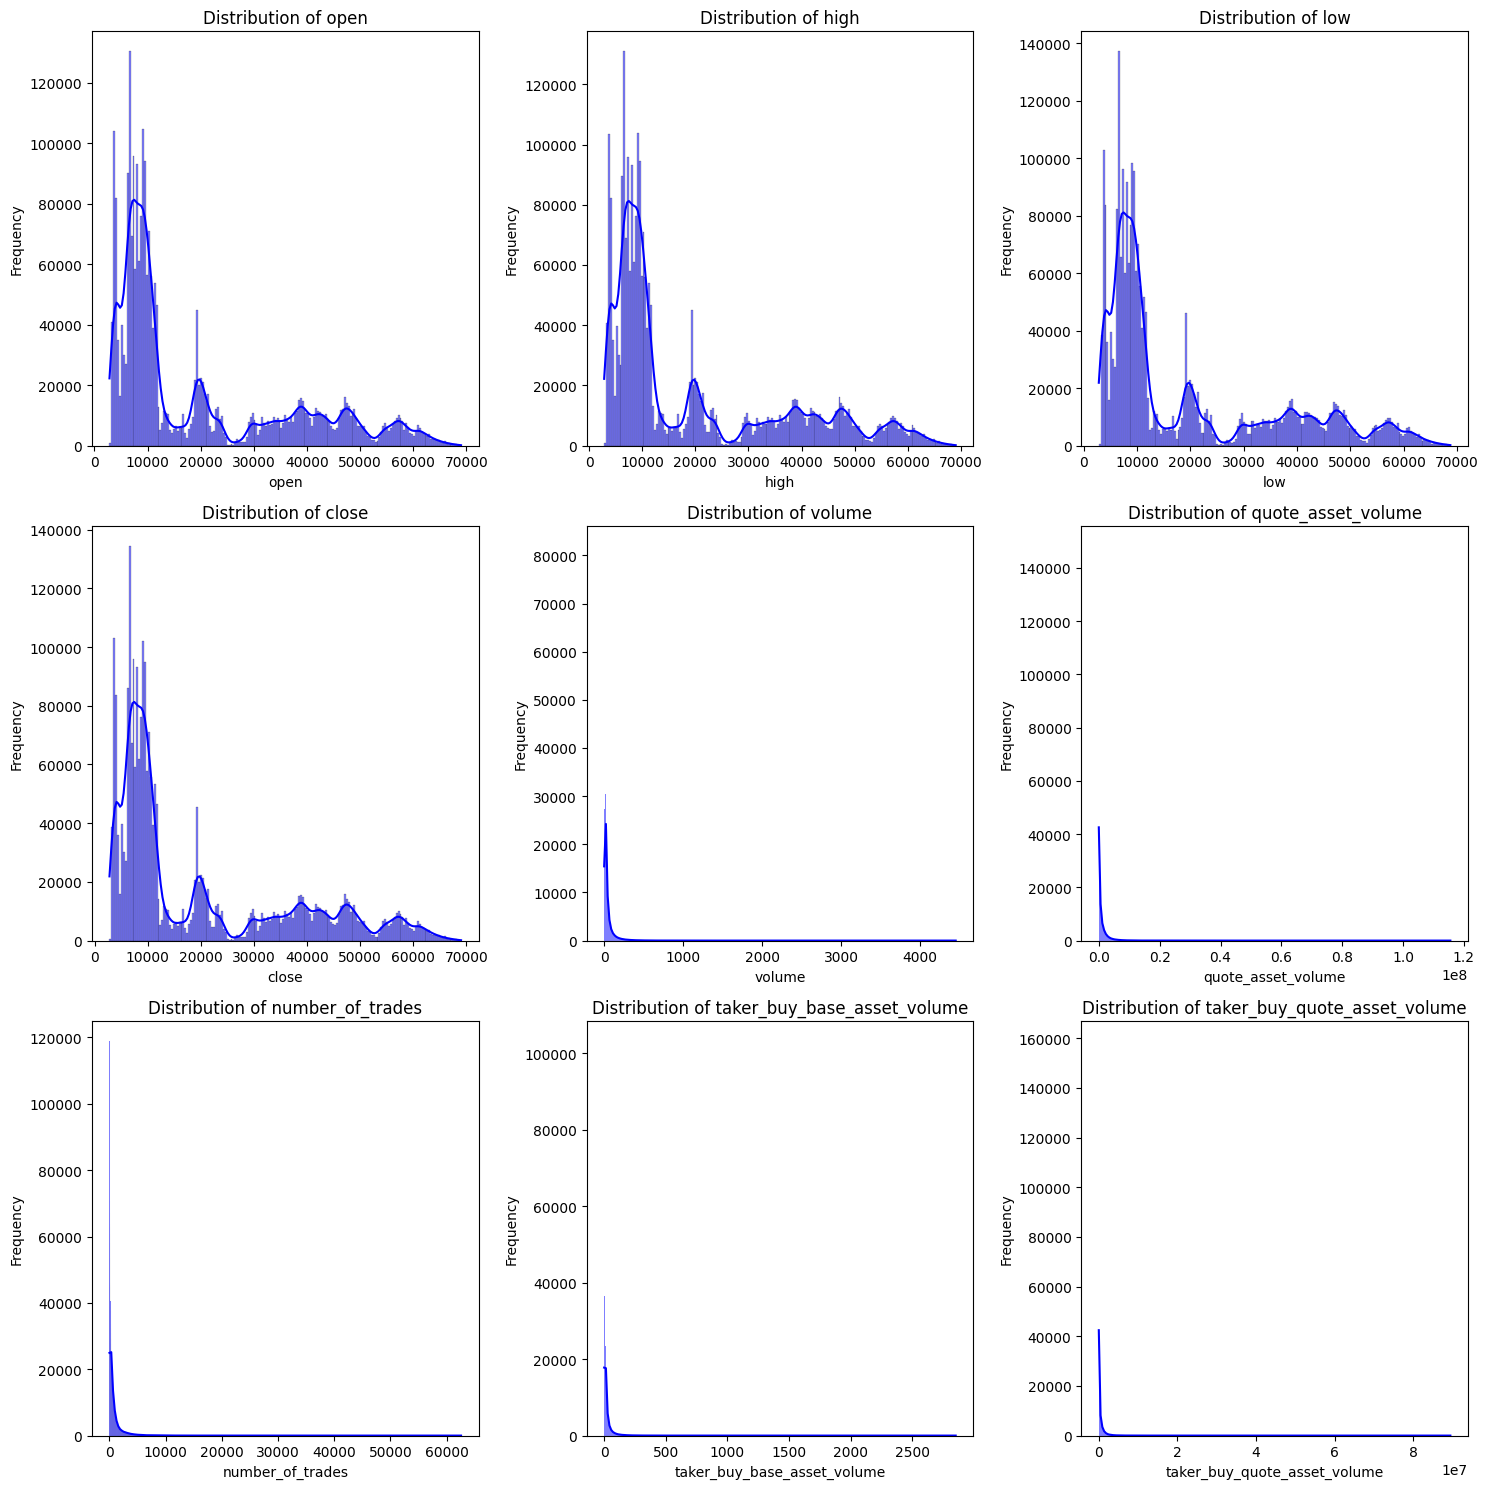

In [6]:
columns_to_plot = [
    "open", "high", "low", "close", "volume",
    "quote_asset_volume", "number_of_trades",
    "taker_buy_base_asset_volume", "taker_buy_quote_asset_volume"
]

# Set up the subplots
num_columns = len(columns_to_plot)
rows = (num_columns + 2) // 3  # Arrange in 3 columns per row
fig, axes = plt.subplots(rows, 3, figsize=(15, rows * 5))  # Adjust figure size based on rows
axes = axes.flatten()  # Flatten to iterate easily

# Plot each column
for i, column in enumerate(columns_to_plot):
    sns.histplot(df[column], kde=True, ax=axes[i], color='blue')
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Remove unused subplots
for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  
plt.show()


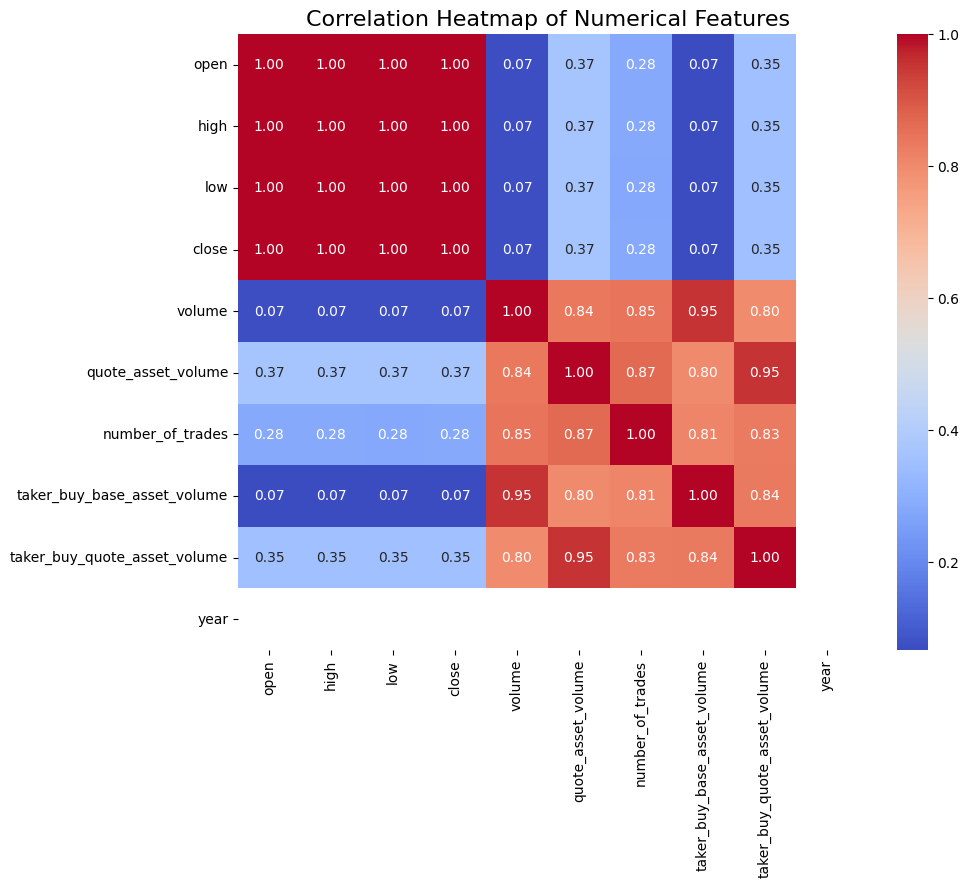

In [31]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))

sns.heatmap(
    correlation_matrix,
    annot=True,  # Annotate with correlation values
    fmt=".2f",  # Format to 2 decimal places
    cmap="coolwarm",  # Color map
    cbar=True  # Show color bar
)

plt.title("Correlation Heatmap of Numerical Features", fontsize=16)
plt.show()


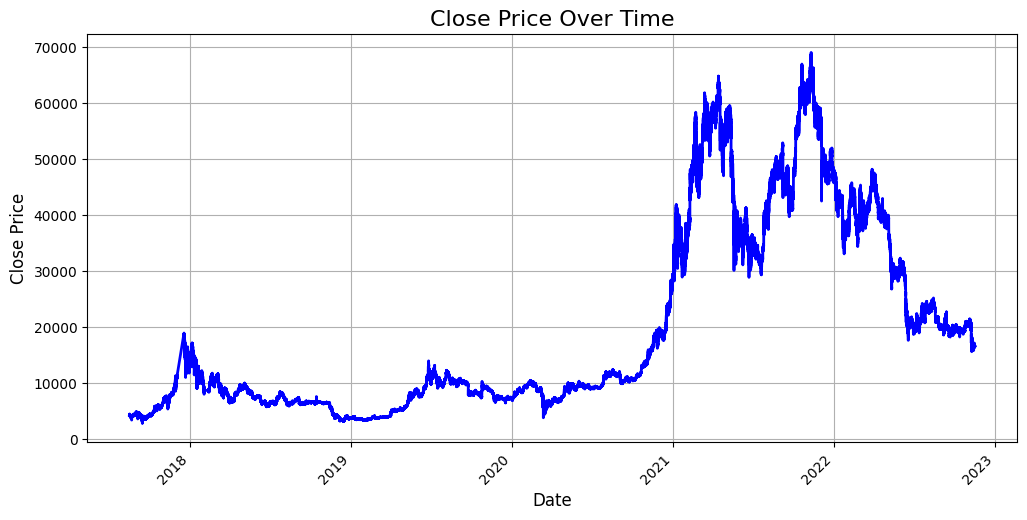

In [22]:
df['close'].plot(kind='line', figsize=(12, 6), color='blue', linewidth=2)

plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price', fontsize=12)
plt.title('Close Price Over Time', fontsize=16)

plt.xticks(rotation=45)

plt.grid(True) 
plt.show()


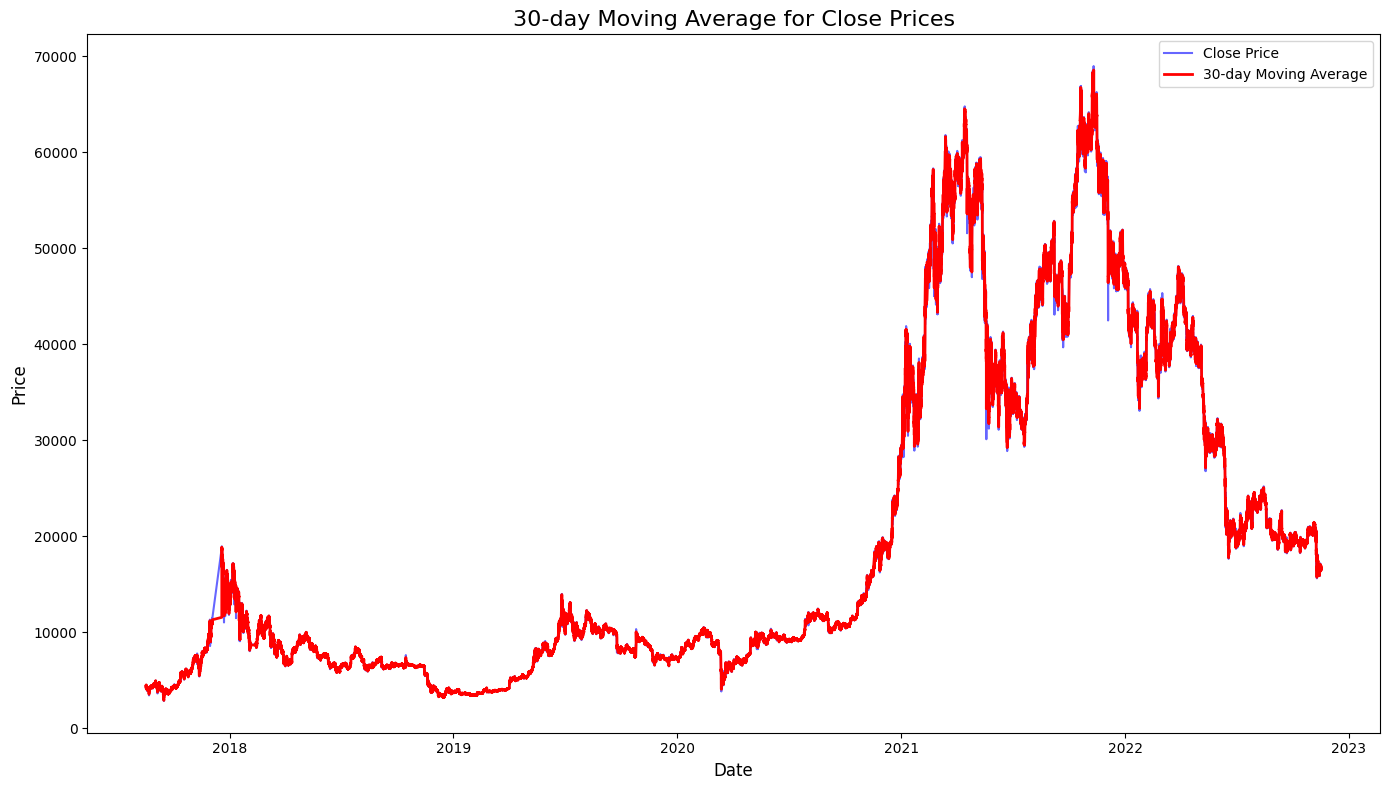

In [7]:
window_size = 30

df['close_moving_avg'] = df['close'].rolling(window=window_size).mean()
df['volume_moving_avg'] = df['volume'].rolling(window=window_size).mean()


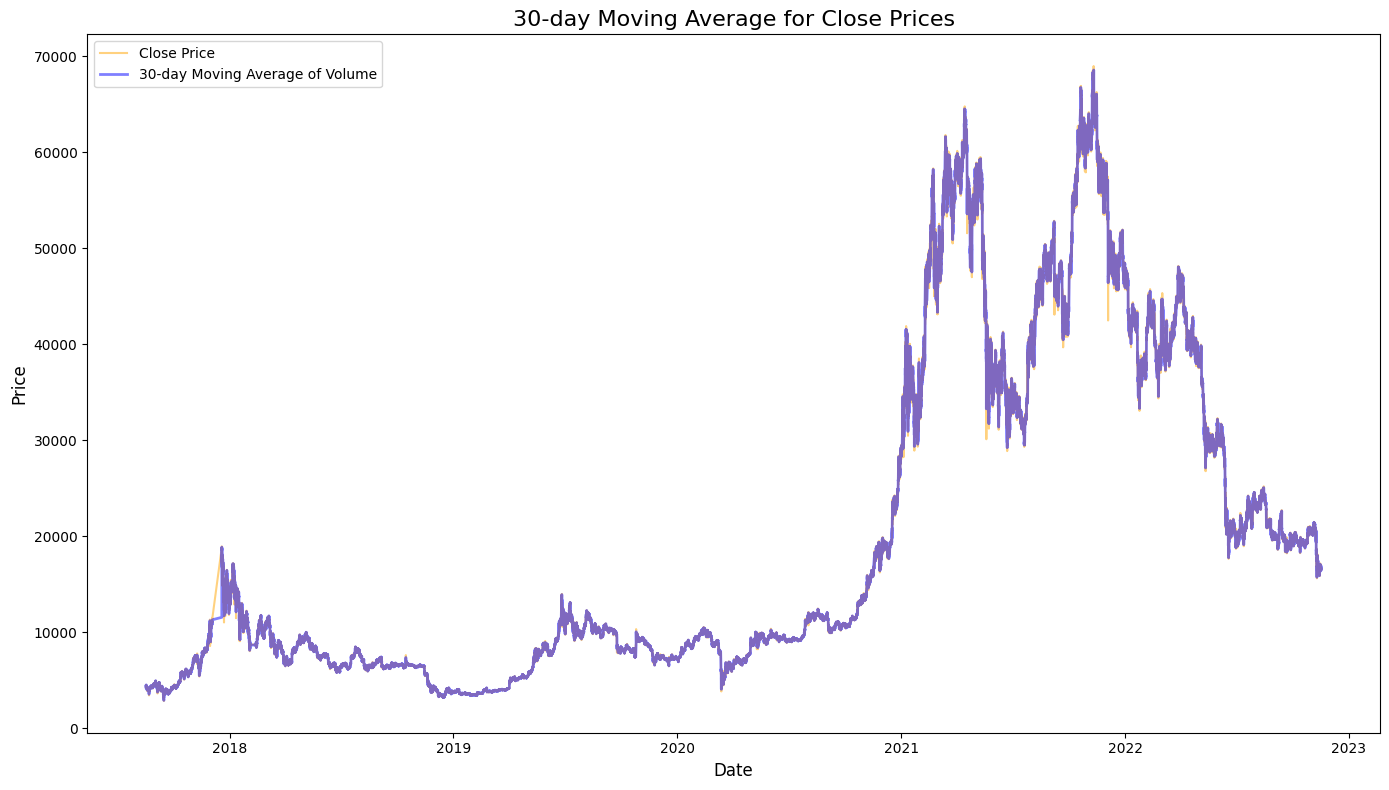

In [13]:
plt.figure(figsize=(14, 8))

plt.plot(df['close'], label='Close Price', color='orange', alpha=0.5)

plt.plot(df['close_moving_avg'], label=f'{window_size}-day Moving Average of Volume', color='blue', linewidth=2,alpha=0.5)

plt.title(f'{window_size}-day Moving Average for Close Prices', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend()

plt.tight_layout()
plt.show()

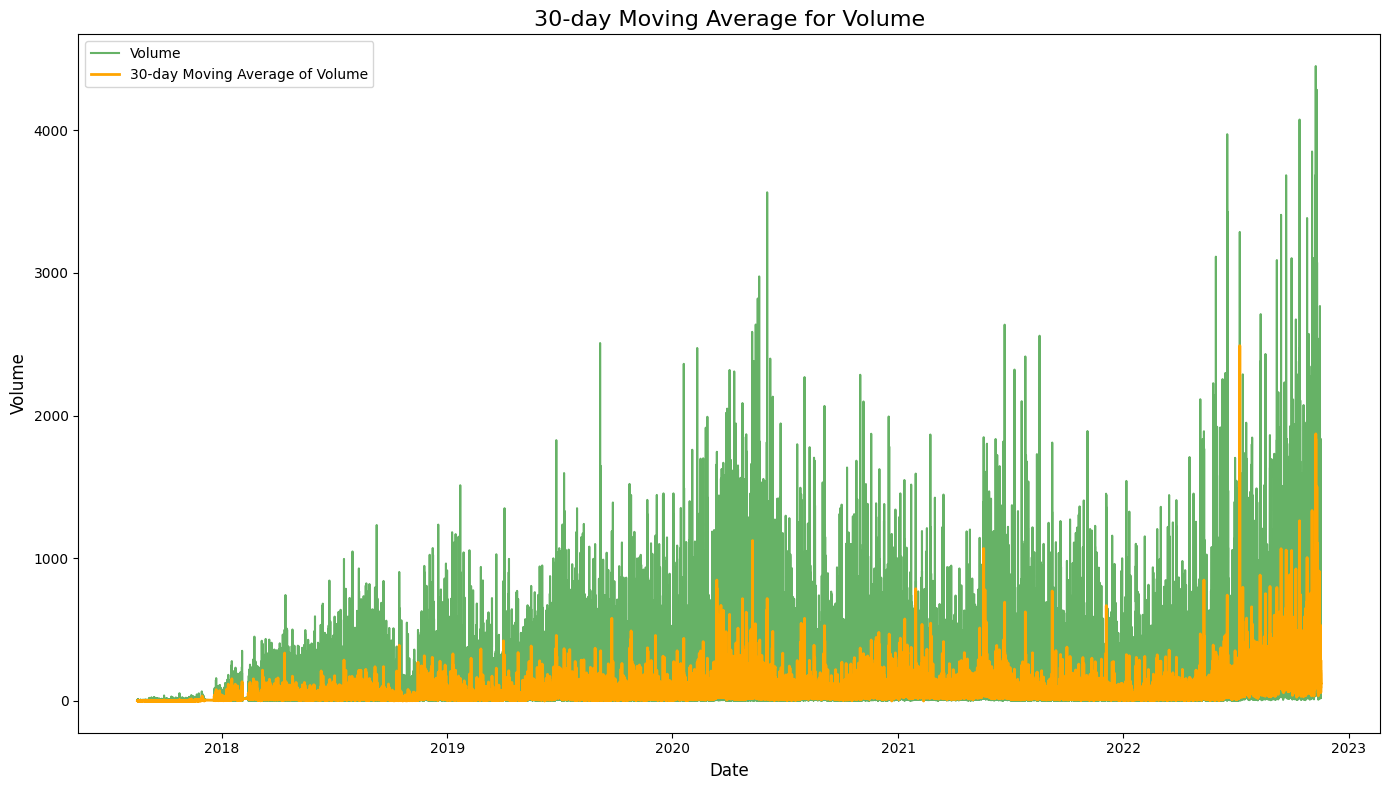

In [9]:
plt.figure(figsize=(14, 8))

plt.plot(df['volume'], label='Volume', color='green', alpha=0.6)

plt.plot(df['volume_moving_avg'], label=f'{window_size}-day Moving Average of Volume', color='orange', linewidth=2)

plt.title(f'{window_size}-day Moving Average for Volume', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Volume', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()


In [8]:
df.columns

Index(['open', 'high', 'low', 'close', 'volume', 'quote_asset_volume',
       'number_of_trades', 'taker_buy_base_asset_volume',
       'taker_buy_quote_asset_volume'],
      dtype='object')

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
np.random.seed= 42
x = df['number_of_trades'].sample(50000).values
y = df['volume'].sample(50000).values

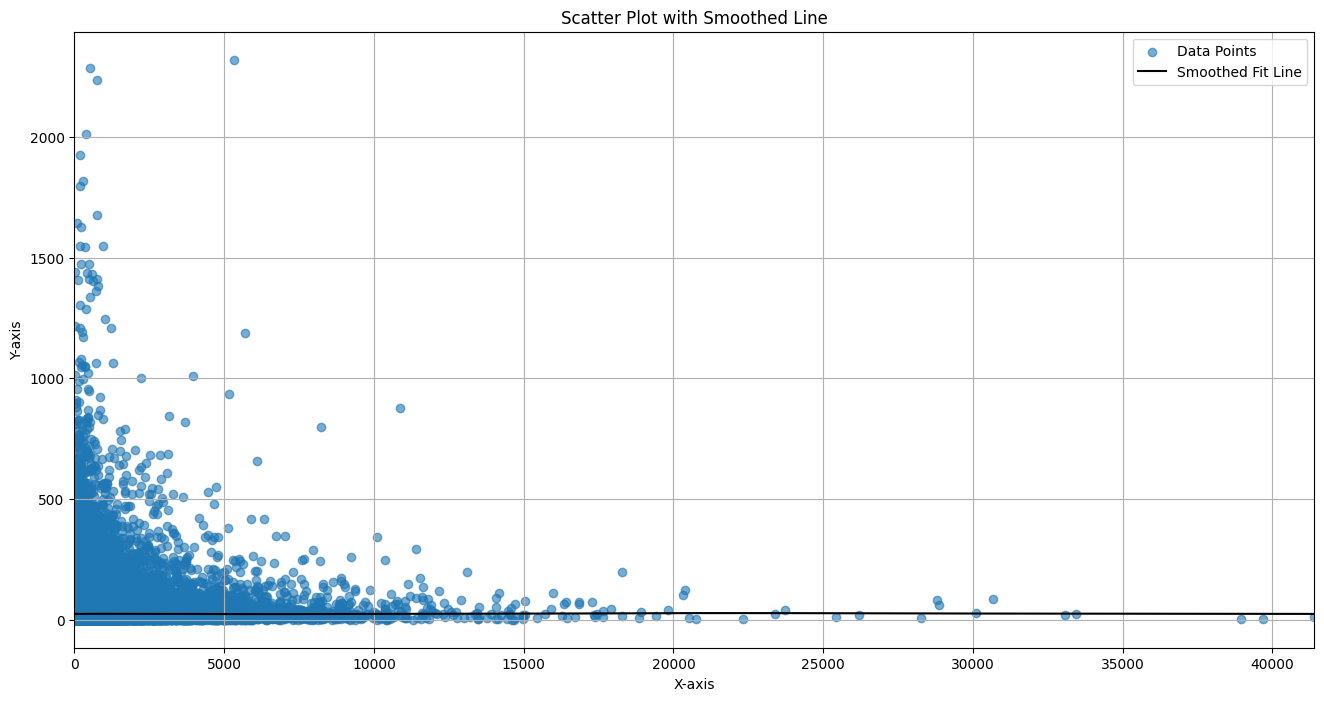

In [16]:
# Fit a lowess (locally weighted scatterplot smoothing) model using statsmodels
smoothed = sm.nonparametric.lowess(y, x, frac=0.3)

# Create the plot using matplotlib
plt.figure(figsize=(16, 8))
plt.scatter(x, y, label="Data Points", alpha=0.6)
plt.plot(smoothed[:, 0], smoothed[:, 1], color="black", label="Smoothed Fit Line")
plt.title("Scatter Plot with Smoothed Line")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.grid(True)

# Automatically adjust axis limits
plt.autoscale(enable=True, axis="x", tight=True)

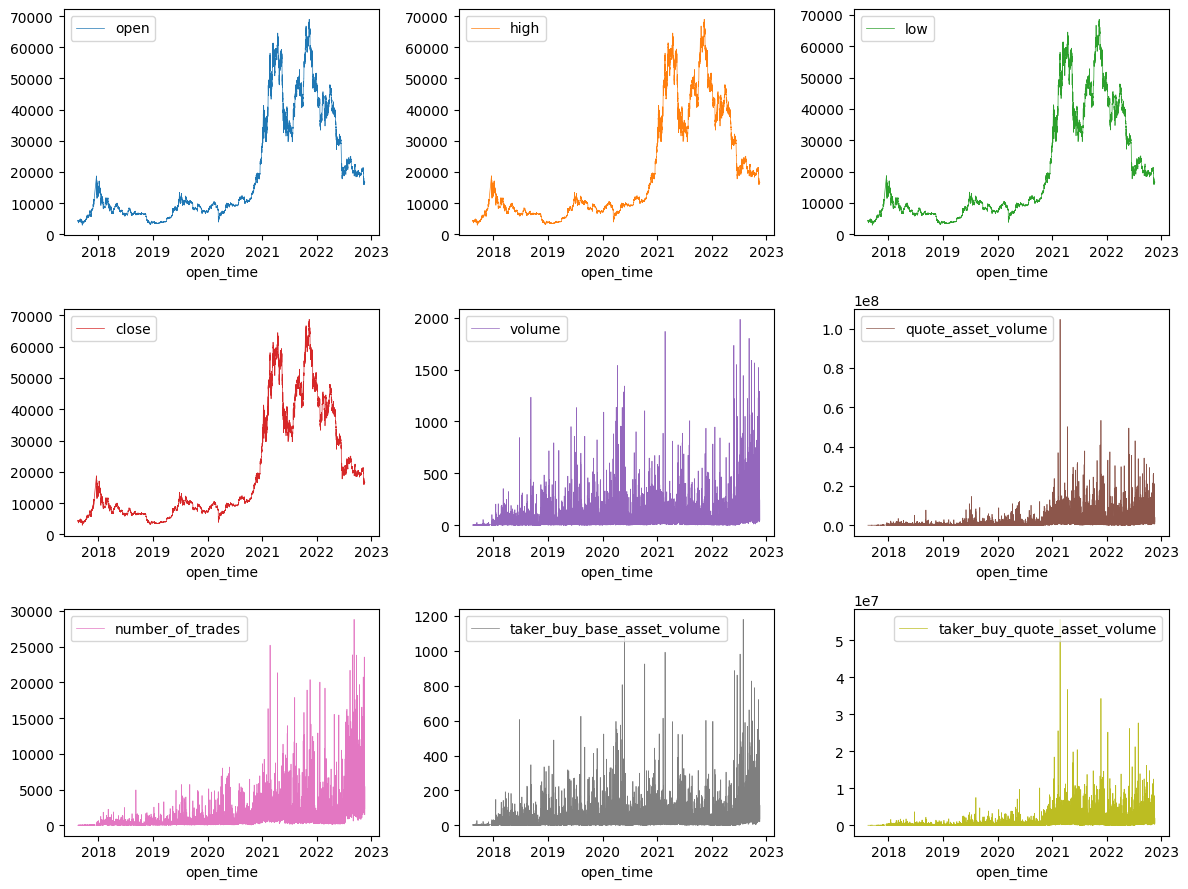

In [13]:
# Sample 9 columns to match the 3x3 layout
columns_to_plot = df.sample(50000).iloc[:, :9] 

columns_to_plot.plot(
    subplots=True,
    linewidth=0.5,
    layout=(3, 3),
    figsize=(12, 9),  
    sharex=False,
    sharey=False
)
plt.tight_layout()  
plt.show()

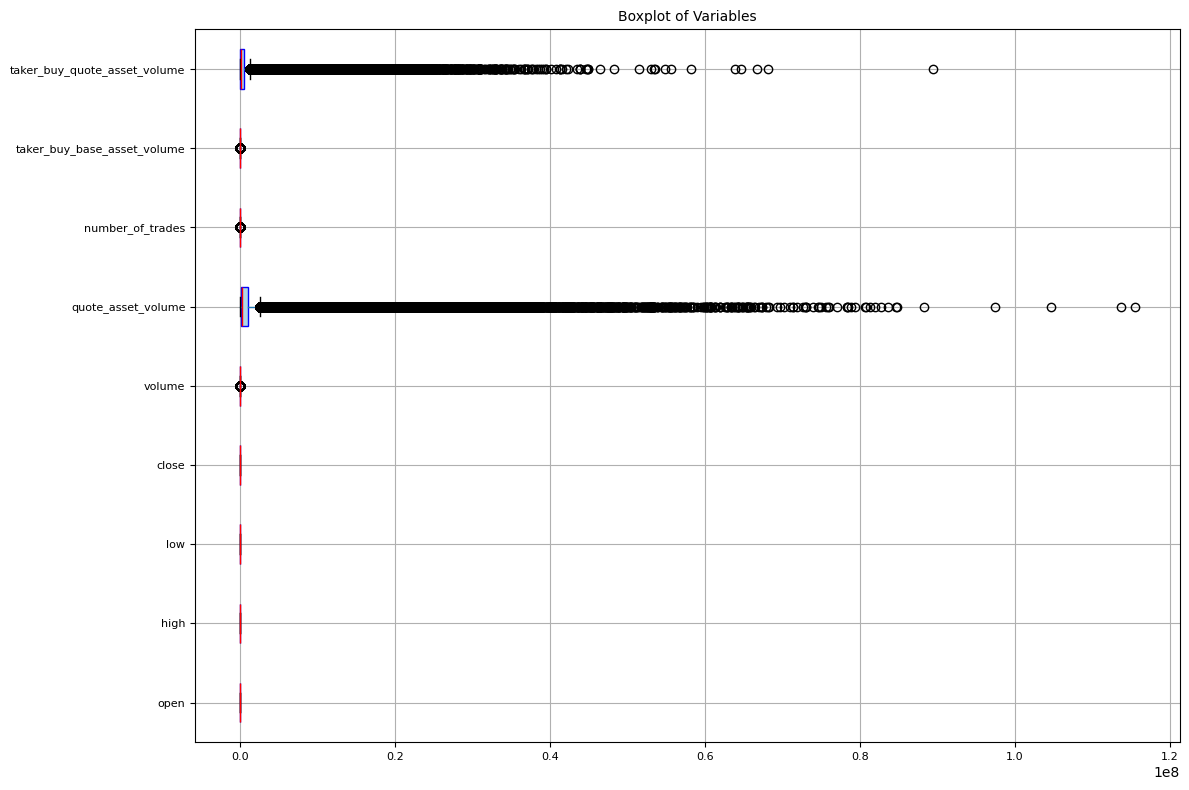

In [15]:
plt.figure(figsize=(12, 8))
df.boxplot(
    fontsize=8,        # Slightly larger font size for better readability
    vert=False,        # Horizontal boxplots for better use of space
    patch_artist=True, # Color-filled boxplots for better visualization
    boxprops=dict(facecolor="lightblue", color="blue"), # Styling
    medianprops=dict(color="red"), # Highlight medians
)

plt.title("Boxplot of Variables", fontsize=10)

plt.tight_layout()  # Adjust layout to avoid overlaps
plt.show()


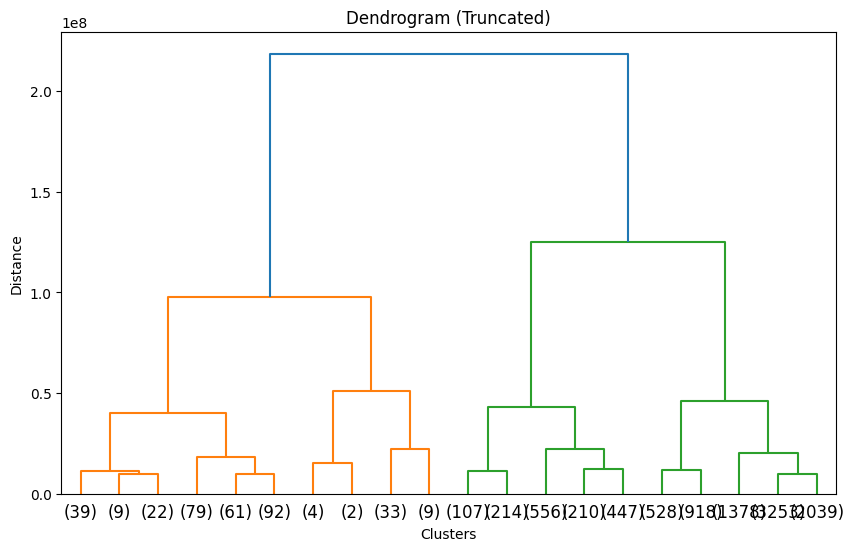

In [19]:
from scipy.cluster.hierarchy import dendrogram, linkage
sample_df = df.sample(10000, random_state=42)

# Compute linkage matrix
linkage_matrix = linkage(sample_df, method='ward')

# Plot truncated dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, truncate_mode='lastp', p=20)  # Show only the last 20 clusters
plt.title("Dendrogram (Truncated)")
plt.xlabel("Clusters")
plt.ylabel("Distance")
plt.show()


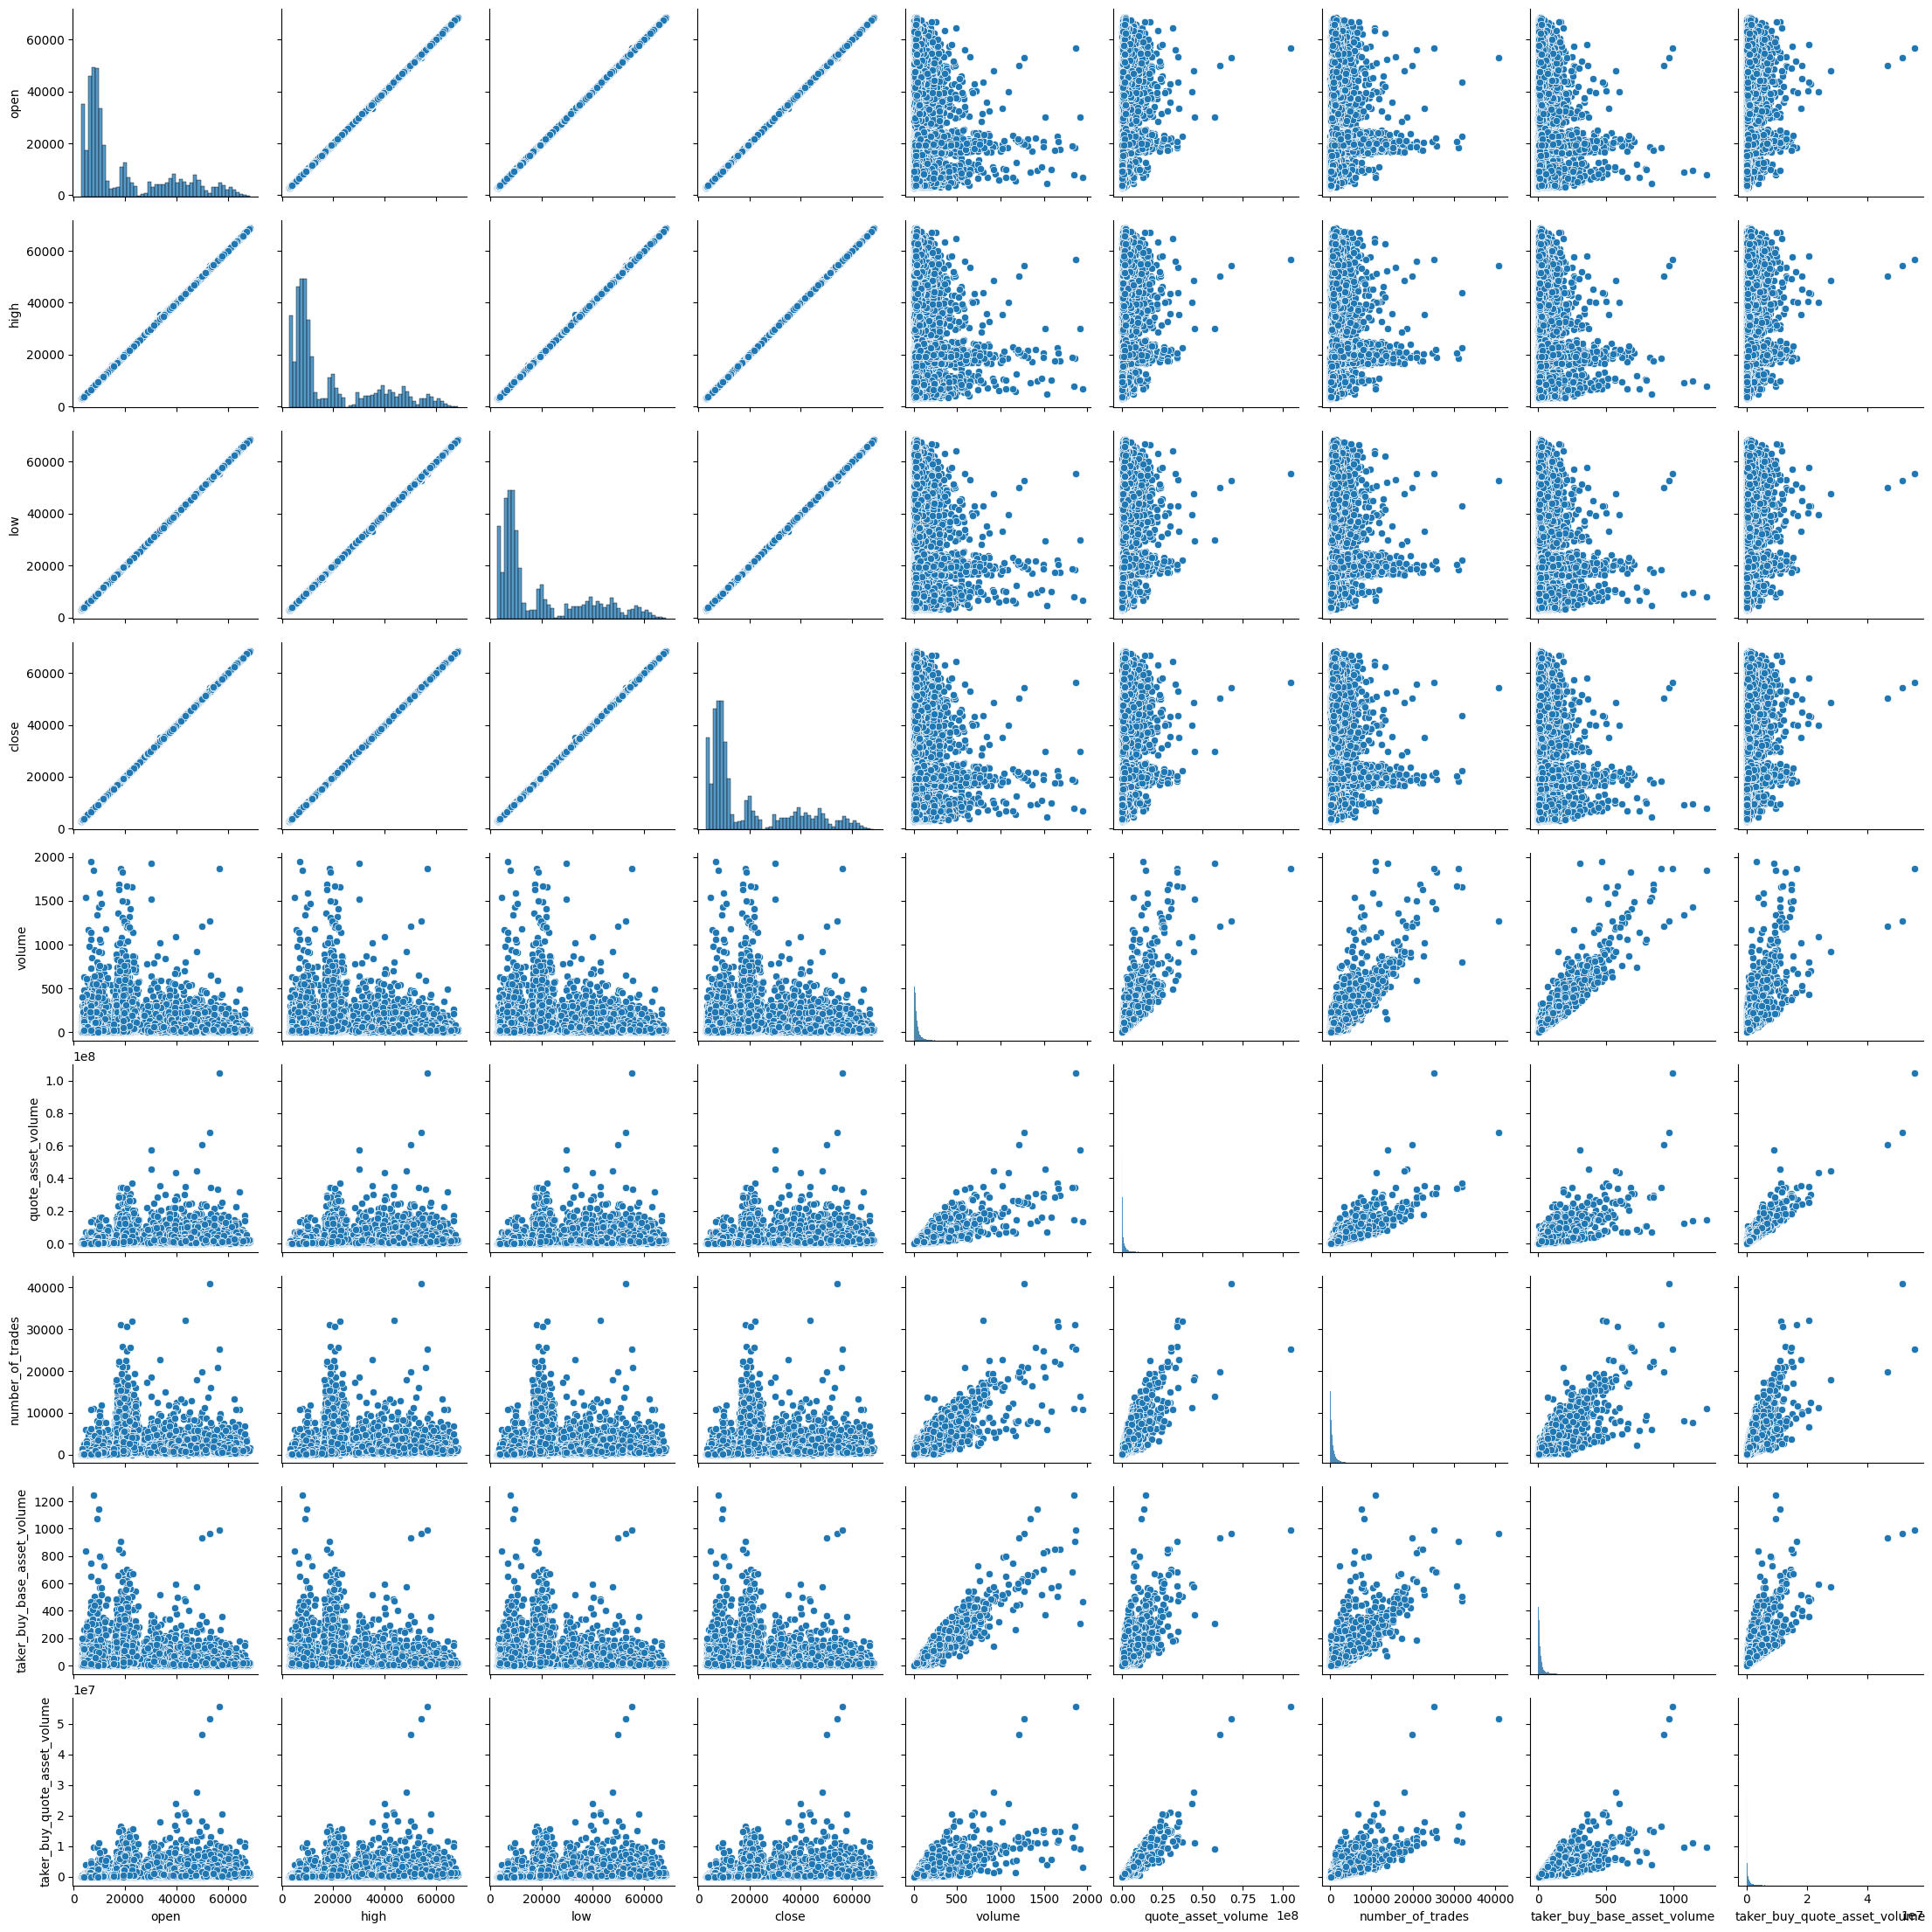

In [19]:
df_pair=df.sample(50000)
sns.pairplot(df_pair)

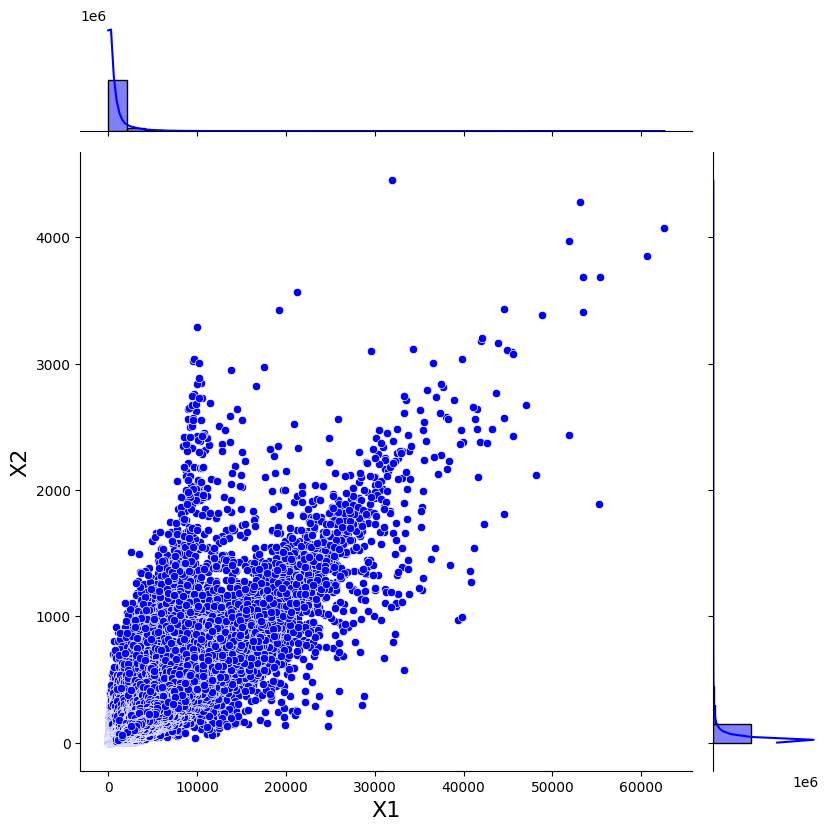

In [28]:
# Hexbin joint 
x = df['number_of_trades'].values
y = df['volume'].values
g = sns.JointGrid(x=x, y=y, height=8)  # Adjust overall grid size

# Add scatter plot
g.plot_joint(sns.scatterplot, color="blue")

# Add larger marginal histograms
g.plot_marginals(sns.histplot, kde=True, bins=30, color="blue")
g.set_axis_labels("X1", "X2", fontsize=16)
plt.show()

In [33]:
df.columns

Index(['open', 'high', 'low', 'close', 'volume', 'quote_asset_volume',
       'number_of_trades', 'taker_buy_base_asset_volume',
       'taker_buy_quote_asset_volume'],
      dtype='object')

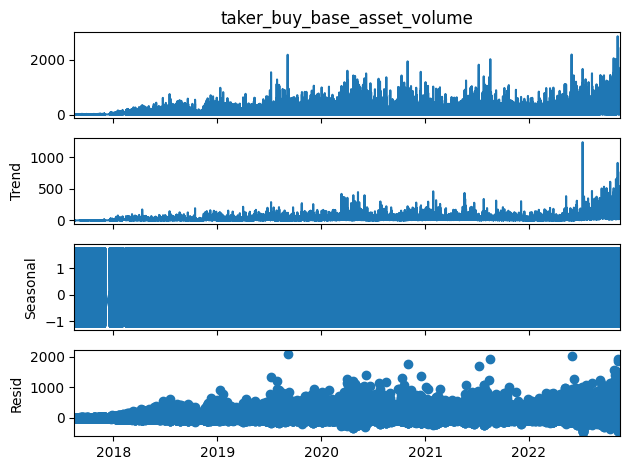

In [8]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(df['taker_buy_base_asset_volume'], model='additive', period=30)
fig = decomposition.plot()
plt.show()

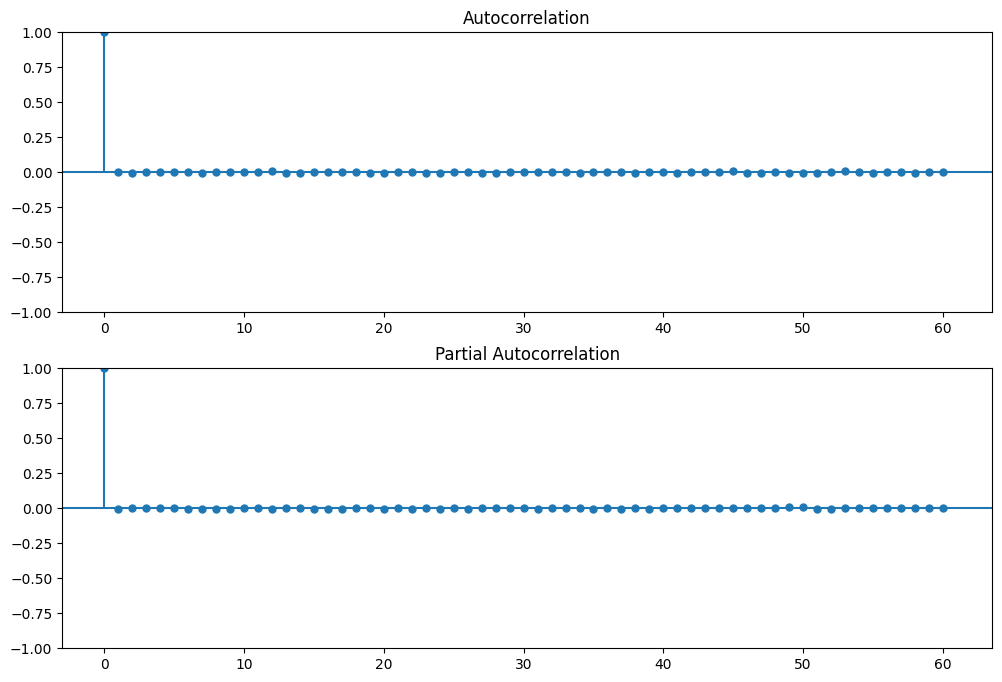

In [35]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['taker_buy_base_asset_volume'].sample(100000), lags=60, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['taker_buy_base_asset_volume'].sample(100000), lags=60, ax=ax2)

In [7]:
import sklearn
from tsai.all import *
my_setup(sklearn)

os              : Linux-5.15.0-1072-aws-x86_64-with-glibc2.31
python          : 3.10.10
tsai            : 0.3.9
fastai          : 2.7.18
fastcore        : 1.7.26
sklearn         : 1.3.2
torch           : 2.2.1+cu121
device          : cpu
cpu cores       : 2
threads per cpu : 2
RAM             : 15.34 GB
GPU memory      : N/A


In [8]:
df = df.reset_index()

In [9]:
print(df['open_time'])

0         2017-08-17 04:00:00+00:00
1         2017-08-17 04:01:00+00:00
2         2017-08-17 04:02:00+00:00
3         2017-08-17 04:03:00+00:00
4         2017-08-17 04:04:00+00:00
                     ...           
2719844   2022-11-16 23:55:00+00:00
2719845   2022-11-16 23:56:00+00:00
2719846   2022-11-16 23:57:00+00:00
2719847   2022-11-16 23:58:00+00:00
2719848   2022-11-16 23:59:00+00:00
Name: open_time, Length: 2719849, dtype: datetime64[ns, UTC]


In [10]:
def basic_data_preparation_fn(df, datetime_col='open_time', freq='T', keep='last'):
    """
    Perform basic data preparation: remove duplicates, sort, add missing datetimes, and forward-fill.
    
    Parameters:
    - df (pd.DataFrame): Input DataFrame
    - datetime_col (str): Name of the datetime column
    - freq (str): Frequency for missing datetimes (e.g., 'T' for 1 minute)
    - keep (str): Which duplicate to keep ('first', 'last', or False for all duplicates)
    
    Returns:
    - pd.DataFrame: Cleaned and prepared DataFrame
    """
    df[datetime_col] = pd.to_datetime(df[datetime_col], utc=True)
    
    df = df.drop_duplicates(subset=datetime_col, keep=keep)
    
    df = df.sort_values(by=datetime_col).reset_index(drop=True)
    
    df = df.set_index(datetime_col)
    
    full_index = pd.date_range(start=df.index.min(), end=df.index.max(), freq=freq, tz='UTC')
    
    df = df.reindex(full_index).ffill()
    
    df = df.reset_index().rename(columns={'index': datetime_col})
    
    return df

df_cleaned = basic_data_preparation_fn(df, datetime_col='open_time', freq='T')
display(df_cleaned)


,open_time,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
0,2017-08-17 04:00:00+00:00,4261.48,4261.48,4261.48,4261.48,1.775183,7.564907e+03,3.0,0.075183,320.390840
1,2017-08-17 04:01:00+00:00,4261.48,4261.48,4261.48,4261.48,0.000000,0.000000e+00,0.0,0.000000,0.000000
2,2017-08-17 04:02:00+00:00,4280.56,4280.56,4280.56,4280.56,0.261074,1.117543e+03,2.0,0.261074,1117.543000
3,2017-08-17 04:03:00+00:00,4261.48,4261.48,4261.48,4261.48,0.012008,5.117185e+01,3.0,0.012008,51.171852
4,2017-08-17 04:04:00+00:00,4261.48,4261.48,4261.48,4261.48,0.140796,5.999993e+02,1.0,0.140796,599.999300
...,...,...,...,...,...,...,...,...,...,...
2761675,2022-11-16 23:55:00+00:00,16672.87,16675.46,16665.58,16667.23,47.899930,7.984622e+05,1523.0,22.106960,368517.280000
2761676,2022-11-16 23:56:00+00:00,16666.06,16676.90,16662.44,16675.18,86.314830,1.438798e+06,2169.0,47.286330,788269.250000
2761677,2022-11-16 23:57:00+00:00,16675.18,16678.98,16665.54,16671.49,85.274880,1.421645e+06,2066.0,41.849970,697719.300000
2761678,2022-11-16 23:58:00+00:00,16670.24,16675.95,16668.73,16674.31,56.534920,9.425971e+05,1605.0,31.080430,518212.100000


In [11]:
df_cleaned = df_cleaned.drop(columns=['open_time'])

In [12]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2761680 entries, 0 to 2761679
Data columns (total 9 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   open                          float64
 1   high                          float64
 2   low                           float64
 3   close                         float64
 4   volume                        float64
 5   quote_asset_volume            float64
 6   number_of_trades              float64
 7   taker_buy_base_asset_volume   float64
 8   taker_buy_quote_asset_volume  float64
dtypes: float64(9)
memory usage: 189.6 MB


In [11]:
df_cleaned.shape

(2761680, 9)

In [13]:
df_cleaned.columns

Index(['open', 'high', 'low', 'close', 'volume', 'quote_asset_volume',
       'number_of_trades', 'taker_buy_base_asset_volume',
       'taker_buy_quote_asset_volume'],
      dtype='object')

In [14]:
df_cleaned.isnull().sum()

open                            0
high                            0
low                             0
close                           0
volume                          0
quote_asset_volume              0
number_of_trades                0
taker_buy_base_asset_volume     0
taker_buy_quote_asset_volume    0
dtype: int64

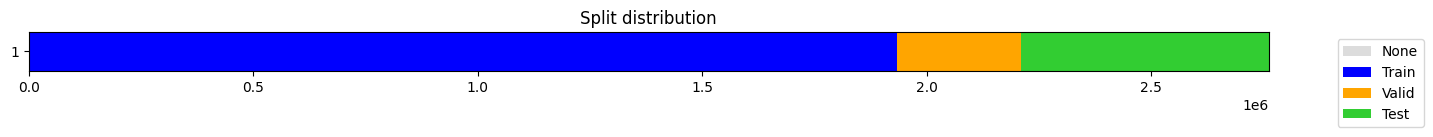

((#1933012) [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19...],
 (#276110) [1933071,1933072,1933073,1933074,1933075,1933076,1933077,1933078,1933079,1933080,1933081,1933082,1933083,1933084,1933085,1933086,1933087,1933088,1933089,1933090...],
 (#552277) [2209240,2209241,2209242,2209243,2209244,2209245,2209246,2209247,2209248,2209249,2209250,2209251,2209252,2209253,2209254,2209255,2209256,2209257,2209258,2209259...])

In [13]:
fcst_history = 104 # # steps in the past
fcst_horizon = 60  # # steps in the future
splits = get_long_term_forecasting_splits(df_cleaned, fcst_history=fcst_history, fcst_horizon=fcst_horizon)
splits

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit and transform the entire dataset
df_scaled = pd.DataFrame(scaler.fit_transform(df_cleaned), columns=df_cleaned.columns, index=df_cleaned.index)
df_scaled.head()

,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
0,-0.897197,-0.897379,-0.896985,-0.897173,-0.534199,-0.485112,-0.573376,-0.540210,-0.471772
1,-0.897197,-0.897379,-0.896985,-0.897173,-0.556002,-0.488873,-0.575545,-0.542020,-0.472083
2,-0.896070,-0.896253,-0.895857,-0.896046,-0.552796,-0.488318,-0.574099,-0.535737,-0.470999
3,-0.897197,-0.897379,-0.896985,-0.897173,-0.555855,-0.488848,-0.573376,-0.541731,-0.472033
4,-0.897197,-0.897379,-0.896985,-0.897173,-0.554273,-0.488575,-0.574822,-0.538631,-0.471501


In [15]:
X, y = SlidingWindow(15, horizon=1)(df_scaled)

In [16]:
print(X.shape)
print(y.shape)

(2761665, 9, 15)
(2761665, 9)


In [17]:
# splits = TimeSplitter(valid_size=20000, fcst_horizon=10)(y)
# splits

In [29]:
batch_tfms = TSStandardize()
tfms = [None, TSForecasting()]
# Dataset dimensions
n_samples, n_features, seq_len = 2761650, 9, 15
pred_len = 9  # Matches the second dimension of y

# Architecture configuration for TSTPlus
arch_config = dict(
    n_layers=3,          # Number of encoder layers
    n_heads=4,           # Number of attention heads
    d_model=64,          # Embedding dimension
    d_ff=128,            # Feedforward network dimension
    dropout=0.2,         # General dropout
    attn_dropout=0.1,    # Dropout in attention weights
    fc_dropout=0.2,      # Dropout in final fully connected layer
    norm='layer',        # Normalization type
    act='gelu',          # Activation function
    ks=3                 # Task type (regression for forecasting)
)

# Initialize the TSForecaster with TSTPlus
fcst = TSForecaster(
    X,y,
    splits=splits,  # Define your train-validation splits
    path='models', 
    tfms=tfms, 
    batch_tfms=batch_tfms, 
    bs=512, 
    arch="TSTPlus", 
    arch_config=arch_config, 
    metrics=mae,  # Mean Absolute Error as the evaluation metric
    cbs=ShowGraph()  # Callback to show training graphs
)


fcst.summary()


not enough values to plot a chart


TSTPlus (Input shape: 512 x 9 x 15)
Layer (type)         Output Shape         Param #    Trainable 
                     512 x 64 x 15       
Conv1d                                    1792       True      
Dropout                                                        
Linear                                    4160       True      
Linear                                    4160       True      
Linear                                    4160       True      
Dropout                                                        
Linear                                    4160       True      
Dropout                                                        
Dropout                                                        
____________________________________________________________________________
                     512 x 64 x 15       
Transpose                                                      
BatchNorm1d                               128        True      
___________________________________

epoch,train_loss,valid_loss,mae,time
0,0.097892,0.598371,0.537646,07:02
1,0.088397,0.407746,0.245673,07:12
2,0.098848,0.419406,0.276010,07:16
3,0.084539,0.404482,0.252613,07:08
4,0.079936,0.399110,0.232694,06:49


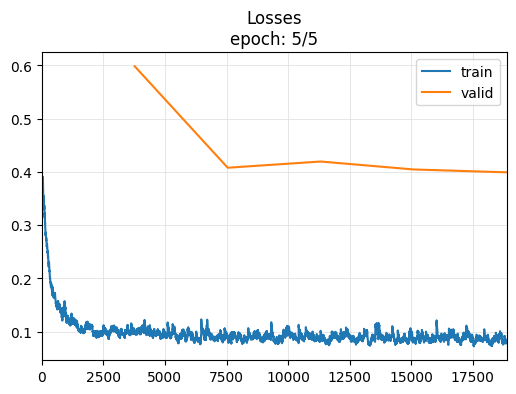

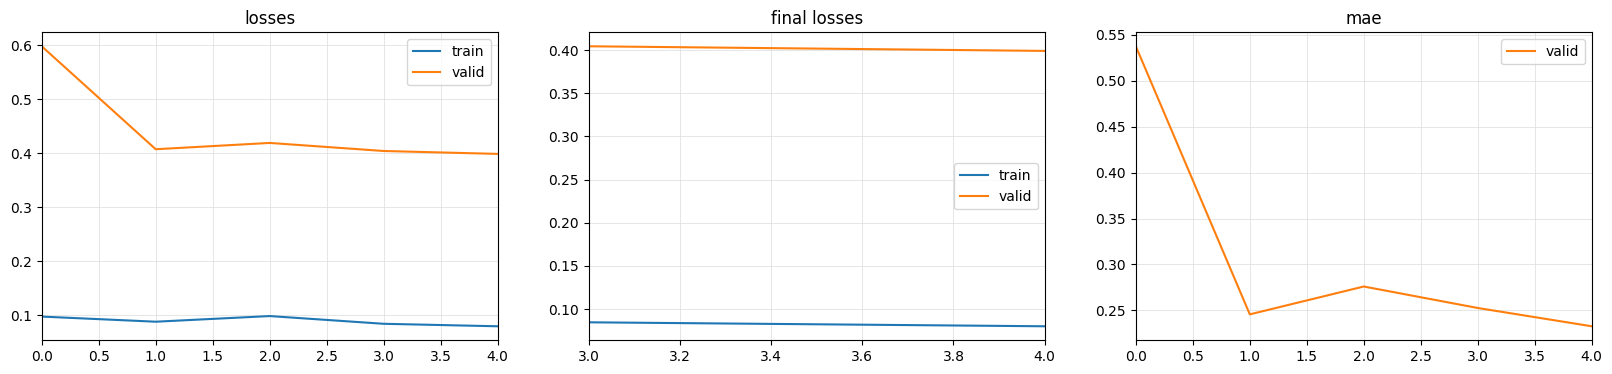

In [31]:
fcst.fit_one_cycle(5, 1e-3)

In [33]:
fcst.export("fcst.pkl")

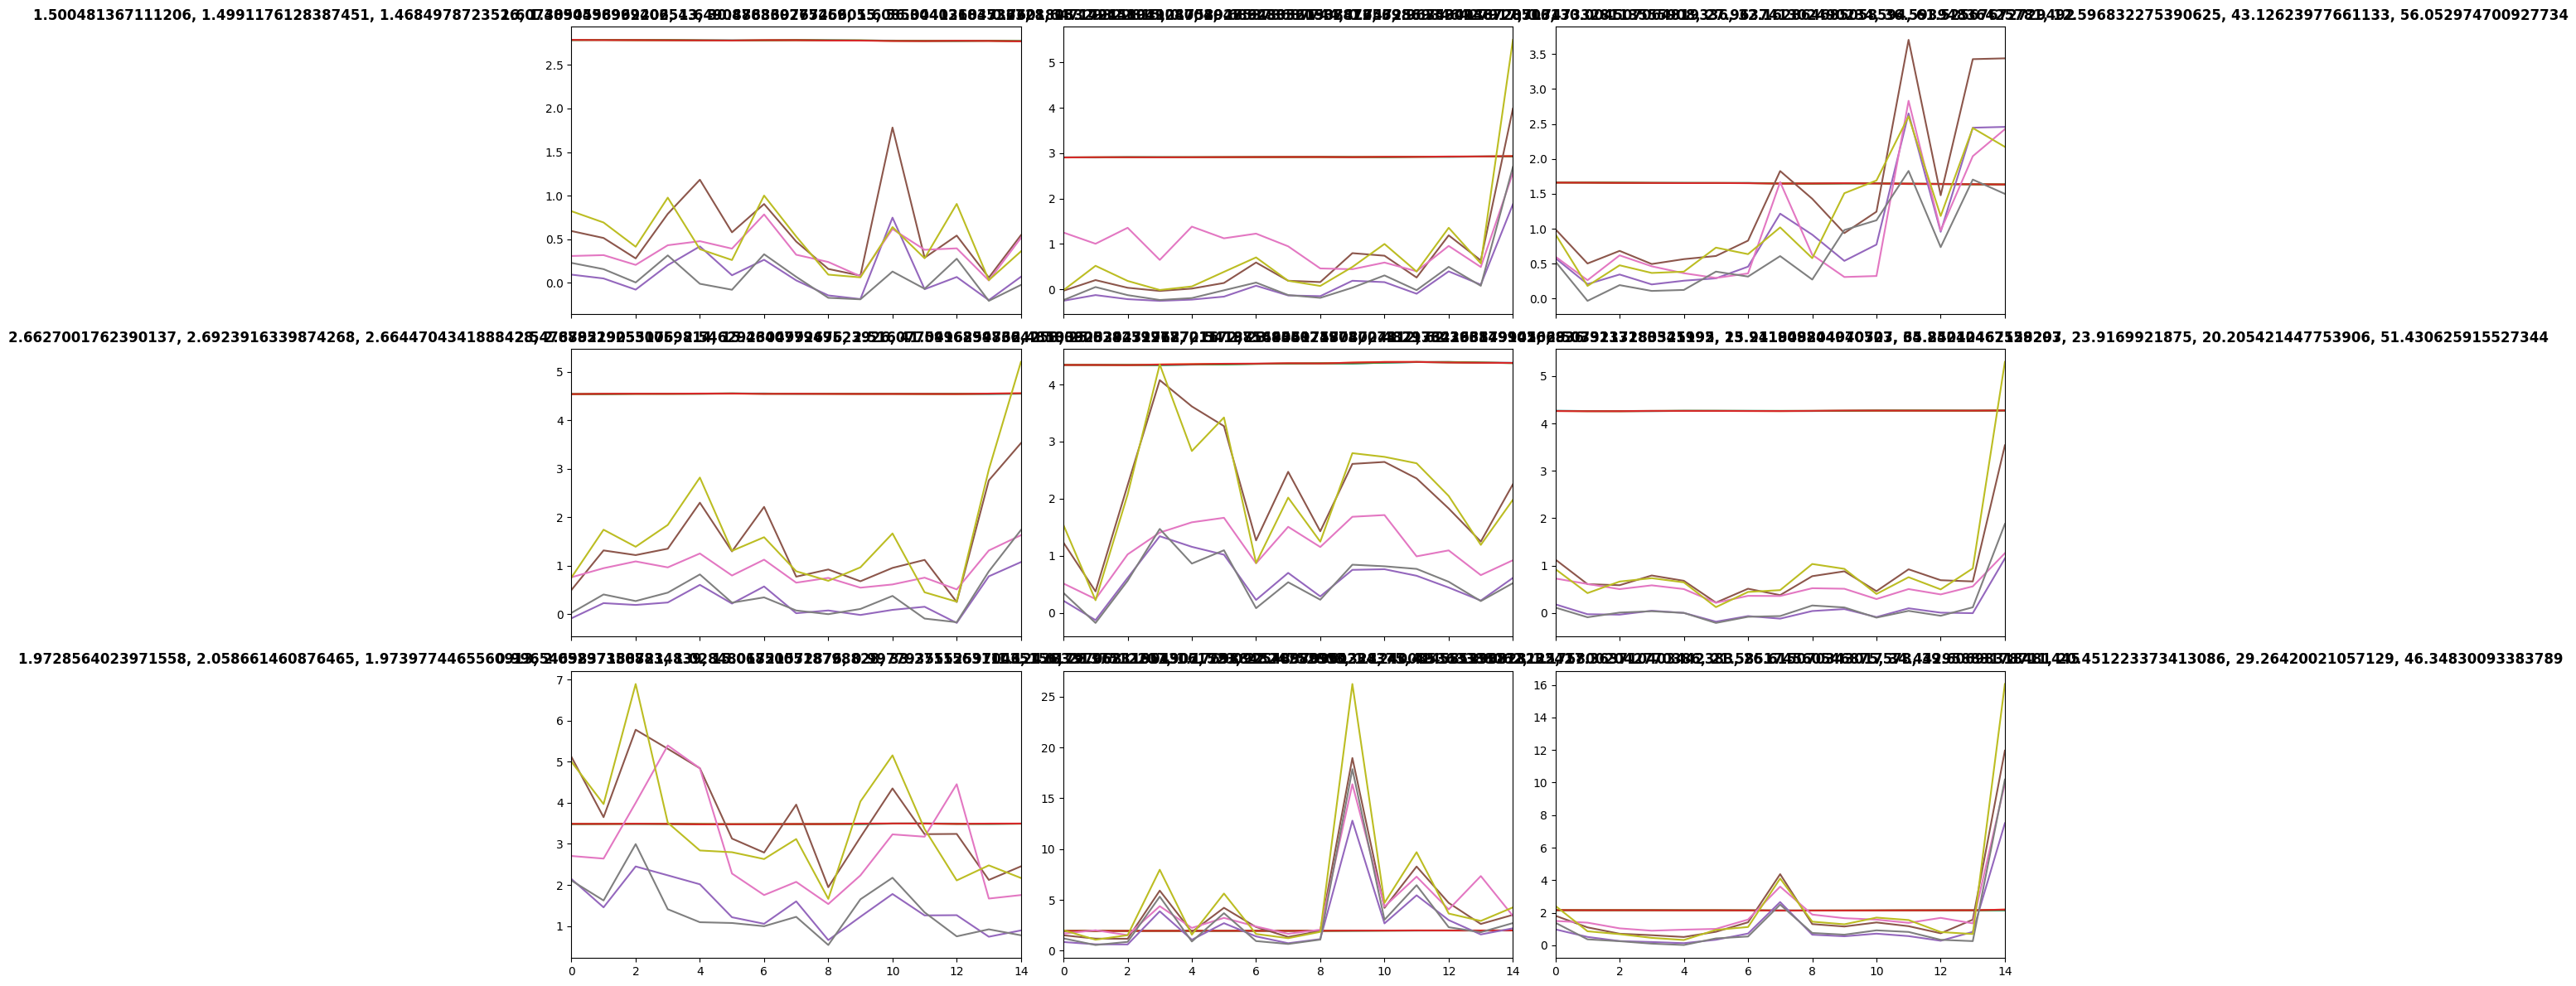

In [38]:
fcst.plot_top_losses(X[splits[1]], y[splits[1]], largest=True)

In [39]:
fcst.top_losses(X[splits[1]], y[splits[1]], largest=True)

(TensorBase([1573.0734,  825.6602,  765.1552,  747.3409,  739.1544,  548.0035,
              540.7772,  538.1758,  452.8217]),
 [172113, 165960, 113578, 263496, 265567, 256691, 243305, 138892, 49298])

X.shape: (1933012, 9, 15)
y.shape: (1933012, 9)
Selected metric: mae
Computing feature importance (permutation method)...


  0 feature: BASELINE             mae: 0.083290


  0 feature: var_0                mae: 0.124297


  1 feature: var_1                mae: 0.136384


  2 feature: var_2                mae: 0.138364


  3 feature: var_3                mae: 0.146798


  4 feature: var_4                mae: 0.103690


  5 feature: var_5                mae: 0.099039


  6 feature: var_6                mae: 0.121781


  7 feature: var_7                mae: 0.095070


  8 feature: var_8                mae: 0.098452



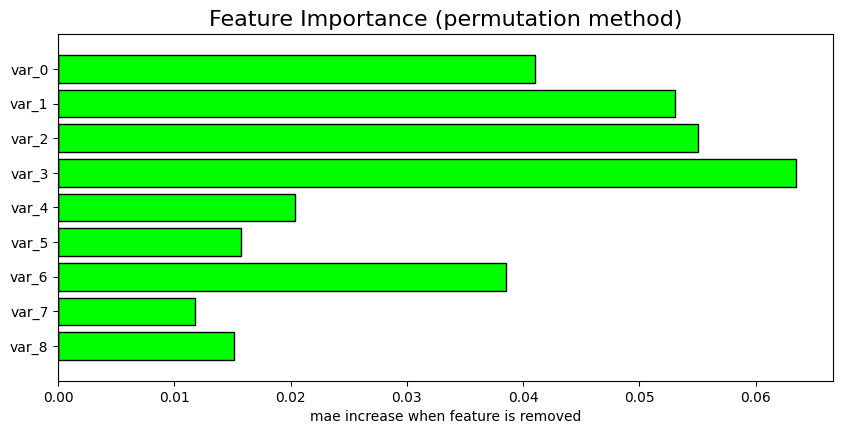

,Feature,mae,mae_change
0,var_3,0.146798,0.063508
1,var_2,0.138364,0.055074
2,var_1,0.136384,0.053094
3,var_0,0.124297,0.041007
4,var_6,0.121781,0.038492
5,var_4,0.103690,0.020400
6,var_5,0.099039,0.015749
7,var_8,0.098452,0.015162
8,var_7,0.095070,0.011780
9,BASELINE,0.083290,0.000000


In [40]:
fcst.feature_importance()

X.shape: (1933012, 9, 15)
y.shape: (1933012, 9)
Selected metric: mae
Computing step importance...


  0 step: BASELINE             mae: 0.083290


  1 step: 0 to 4               mae: 0.159368


  2 step: 5 to 9               mae: 0.156334


  3 step: 10 to 14             mae: 0.222647



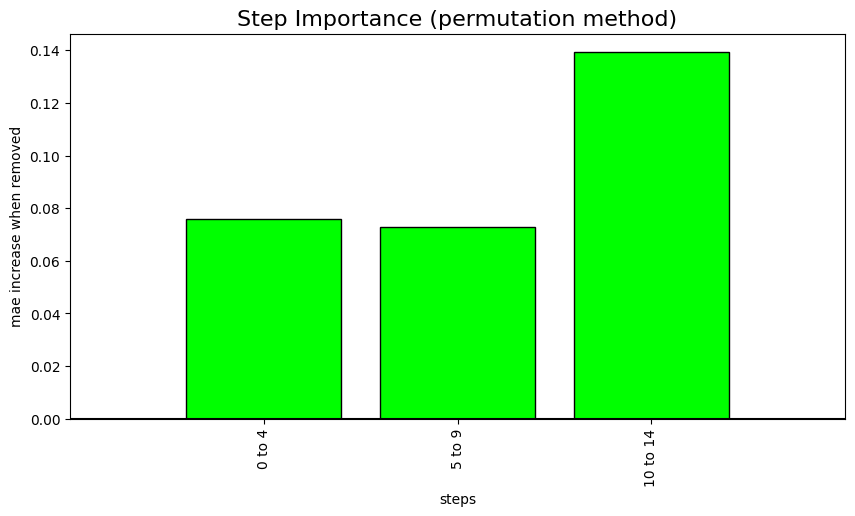

In [41]:
fcst.step_importance(n_steps=5);